<a href="https://colab.research.google.com/github/PedroSarment/classificador_de_ra-as_dog/blob/main/%5Bphsp%5D_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions for your second project


Your second project must apply some of the Deep Learning techniques that you learned during this course.

**Deadline: Oct 10th**

### Example projects

You can choose to do one of the example projects below or come up with something different. If you think of something different, please consult with me before you start working on your project.

**Save your model and add a widget so I can test your model's predictions.**

* Improve your image classifier that you built based on [Chapter 2](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb). Register the results before and after using the image cleaner, and also before and after applying the techniques taught in [Chapter 5](https://colab.research.google.com/github/fastai/fastbook/blob/master/05_pet_breeds.ipynb) to improve your model's accuracy.
* Deploy your image classifier to a webpage.
* Generalize all the steps in [Chapter 4](https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb) using the full MNIST datasets (that is, for all digits, not just 3s and 7s). 
* Retrain the bear classifier from [Chapter 2](https://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) using multi-label classification. See if you can make it work effectively with images that don't contain any bears, including showing that information in the web application. Try an image with two different kinds of bears. Check whether the accuracy on the single-label dataset is impacted using multi-label classification.
* Complete notebook 8 using the full MovieLens dataset, and compare your results to online benchmarks. See if you can improve your accuracy. Look on the book's website and the fast.ai forum for ideas. Note that there are more columns in the full dataset—see if you can use those too (chapter 9 might give you ideas).

### Code written and explained in a Jupyter Notebook

You should write and explain your code on a Jupyter Notebook written on Google Colab.

You must submit:
  * Your notebook
  * Your exported model, `export.pkl`, so I can test it.

### Grading criteria

* Projects lacking code to load `export.pkl`, a pickle of the exported model, or a widget to test the model will get **grade 0**.
* Projects that failed to achieve the intended training should include comments as to why the dataset failed to train the NN.
* Don't only write code blocks, but also text blocks explaining how it all works.

# Project

Deploy your image classifier to a webpage.

In this project, I will use the tools presented in chapter two of the Fasbook to develop a classifier of three dog breeds, poodle, dachshund and labrador retriever.

In [1]:
#hide
#! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 14.3 MB/s 
     |████████████████████████████████| 441 kB 59.7 MB/s 
     |████████████████████████████████| 5.3 MB 58.9 MB/s 
     |████████████████████████████████| 1.3 MB 66.5 MB/s 
     |████████████████████████████████| 1.6 MB 53.2 MB/s 
     |████████████████████████████████| 163 kB 66.2 MB/s 
     |████████████████████████████████| 212 kB 49.1 MB/s 
     |████████████████████████████████| 115 kB 52.2 MB/s 
     |████████████████████████████████| 127 kB 55.7 MB/s 
     |████████████████████████████████| 115 kB 7.7 MB/s 
     |████████████████████████████████| 7.6 MB 56.0 MB/s 
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

To create the classifier, use the Bing Image Search API, available through Microsoft Azure tools. Because of that, I add the credentials to the code.



In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '4d1eb657040a40b4b2787c7711fbf1dc')

First, I create a folder for each race that I will use in the classifier.

In [4]:
dog_breeds = 'poodle','dachshund','labrador'
path = Path('breeds')

In the next cell, I do a search on bing image search with the text "breed name + dog" and save the results in the folder with the respective name.




In [5]:
if not path.exists():
    path.mkdir()
    for o in dog_breeds:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} dog')
        download_images(dest, urls=results.attrgot('contentUrl'))

Checking if files have been downloaded

In [6]:
fns = get_image_files(path)
fns

(#441) [Path('breeds/dachshund/4016c591-5993-4b54-babb-6b6074b8abfe.jpg'),Path('breeds/dachshund/c652197a-809d-40d1-af19-3ecd5d97e484.jpg'),Path('breeds/dachshund/dabdcd1d-693d-414a-b097-2c307ccb7518.jpg'),Path('breeds/dachshund/a4316fbc-711f-45b1-ada5-4def85e56ecb.jpg'),Path('breeds/dachshund/155fe150-d714-4bcf-b34a-829f09367385.jpg'),Path('breeds/dachshund/d43d08f9-6a2e-4d08-ab97-2e7f8bc4c90d.jpg'),Path('breeds/dachshund/8786a792-36f8-4c31-9d13-36ef6c6d2893.jpg'),Path('breeds/dachshund/b7cb8b66-efb3-4751-8215-20271ace8a27.jpg'),Path('breeds/dachshund/d88b9957-0a81-4af7-ab4b-03a6a28acf04.jpeg'),Path('breeds/dachshund/e47b6704-c87f-4e4d-9cb7-b6568f2c6d10.png')...]

Checking if we have corrupt files in the created folders



In [7]:
failed = verify_images(fns)
failed

(#5) [Path('breeds/dachshund/2d6972c5-da55-4173-ada2-183ce4237661.jpeg'),Path('breeds/labrador/13bd7fc3-476f-4031-a032-5dd4d2a71d38.jpg'),Path('breeds/labrador/1a1bb0bc-736a-4aa7-ba1d-5c7ec5777f4e.jpg'),Path('breeds/poodle/91150dec-fa8e-48b5-be46-78626a3035c1.jpg'),Path('breeds/poodle/6a3f233b-1c1f-4fed-b58a-7dff226ba9e3.jpg')]


The verify_images function returned us two corrupt files, I use the unlink function to delete these two images from my folders

In [8]:
failed.map(Path.unlink);

Confirming that I removed all corrupt files

In [9]:
failed = verify_images(fns)
failed

(#5) [Path('breeds/dachshund/2d6972c5-da55-4173-ada2-183ce4237661.jpeg'),Path('breeds/labrador/13bd7fc3-476f-4031-a032-5dd4d2a71d38.jpg'),Path('breeds/labrador/1a1bb0bc-736a-4aa7-ba1d-5c7ec5777f4e.jpg'),Path('breeds/poodle/91150dec-fa8e-48b5-be46-78626a3035c1.jpg'),Path('breeds/poodle/6a3f233b-1c1f-4fed-b58a-7dff226ba9e3.jpg')]

Now I need to transform the downloaded data into DataLoeaders, for that, I first specify what type of data the dataloaders will present, how it will get this data, how the test and training sets will be divided and how the images should be adapted

In [10]:
breeds = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [11]:
dls = breeds.dataloaders(path)


Here I use the RandomResizedCrop function to transform the images, so that the model can see the same dog in different ways

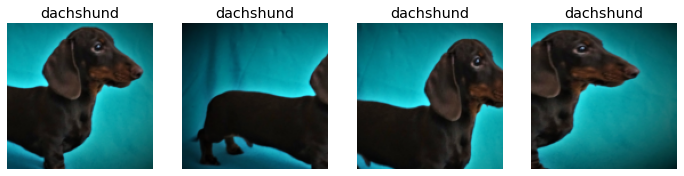

In [12]:
breeds = breeds.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = breeds.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [13]:
breeds = breeds.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = breeds.dataloaders(path)

Now I can create the Learner and start training my model

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.045610,0.158584,0.080460,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.243933,0.060906,0.045977,00:19
1,0.138546,0.046529,0.022989,00:20
2,0.107464,0.033303,0.022989,00:20
3,0.083376,0.039913,0.022989,00:19


# Transforming the Model into an Online Application

Using the export method to export the model, so that it can be used elsewhere

In [15]:
learn.export()

Confirming that the export was done correctly

In [16]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

Now I can start creating a widget to be able to use my model

The first step is to create a button to upload the image that will be classified

In [17]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img = PILImage.create(btn_upload.data[-1])

Using an output widget to show the image that was uploaded

In [26]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

Using load_learner function to upload my model

In [21]:
learn_inf = load_learner(path/'export.pkl')

In [22]:
learn_inf.dls.vocab

['dachshund', 'labrador', 'poodle']

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

Here I create a lebel to show the prediction result

In [28]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: dachshund; Probability: 0.8820')

I need to create one more button, to rotate the model, once the image is added

In [29]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())


Here we define the onclick classify(change) function that will make all this work.

First it receives the image that was added, then it uses the output widget to show the image, after that, it uses the learner to make the prediction and presents the result.

In [30]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [31]:
btn_upload = widgets.FileUpload()

Finally, I add all of this in a vertical box, so I can see it all working together.

In [32]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])